In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [12]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [24]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [3]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [4]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]
stimulus_range = [400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [5]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

# CV

In [15]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25]

In [81]:
import matplotlib as mpl
jet = cm = plt.get_cmap('Blues') 
cNorm  = mpl.colors.Normalize(vmin=-5, vmax=len(sigma_lst)-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors = []
for i in range(len(sigma_lst)):
    colors.append(scalarMap.to_rgba(i))

In [17]:
K = 8.5

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    stds_s_mean.append(np.mean(stds_si, axis=0))

In [18]:
K = 6
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.mean(stds_li, axis=0))

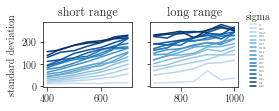

In [82]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.2})

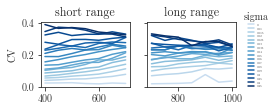

In [83]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('CV')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.2})

In [21]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.0221595 , 0.05413294, 0.07651025, 0.0978966 , 0.1190951 ,
       0.14214152, 0.15060981, 0.1696788 , 0.2007554 , 0.22077025,
       0.23837044, 0.25555949, 0.26796454, 0.29003393, 0.32913087,
       0.34300797, 0.35396547])

In [22]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.03210604, 0.09439817, 0.12511334, 0.14479724, 0.16545488,
       0.18226704, 0.19622793, 0.20620773, 0.21729895, 0.23649206,
       0.23793532, 0.2458915 , 0.2505616 , 0.260644  , 0.28594219,
       0.2919264 , 0.28925909])

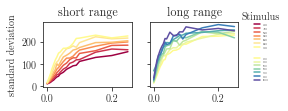

In [49]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors_short)
ax[1].set_prop_cycle(color=colors_long)

for lst, stimulus in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, stimulus in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.37, 0.5), frameon=False,  prop={'size': 3})
ax[0].legend(bbox_to_anchor=(2.7, 1.2), title='Stimulus',frameon=False,  prop={'size': 3.2})

# Parameter Space (K 1-18, sigma = 0.02)

In [86]:
K_lst = np.arange(1, 18, 0.5)
tau = np.arange(60, 190, 10)

print(len(K_lst), len(tau))

34 13


In [36]:
path = '../results/intermediateI/'
short_ktau065, long_ktau065 = pt.load_data(path+'SHORT_K1-18TAU_th065_del700_sig02_fixed_seed-20220728-113920-output.pickle',
                                      path+'LONG_K1-18TAU_th065_del700_sig02_fixed_seed-20220728-111650-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-18TAU_th07_del700_sig02_fixed_seed-20220728-120026-output.pickle', 
                                      path+'LONG_K1-18TAU_th07_del700_sig02_fixed_seed-20220728-121929-output.pickle')
short_ktau075, long_ktau075 = pt.load_data(path+'SHORT_K1-18TAU_th075_del700_sig02_fixed_seed-20220728-134030-output.pickle', 
                                      path+'LONG_K1-18TAU_th075_del700_sig02_fixed_seed-20220728-124551-output.pickle')

threshold 0.75
-18132.02694877189 9070.892965574652


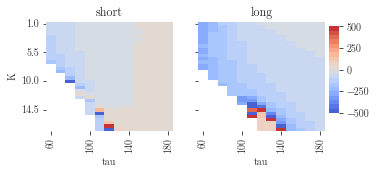

threshold 0.7
-6787.037521142813 11230.554170025694


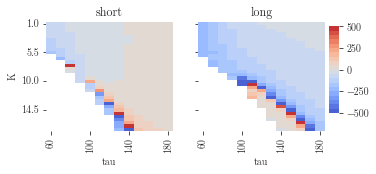

threshold 0.65
-50162.39926356445 32940.64559699417


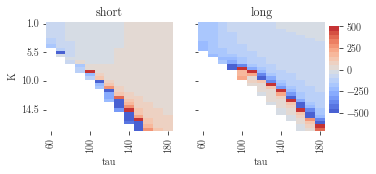

In [41]:
print('threshold', 0.75)
pt.plot_ind_point(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_ind_point(short_ktau065, long_ktau065, K_lst, tau)

threshold 0.75
-0.37530969419635796 1.20963144485069


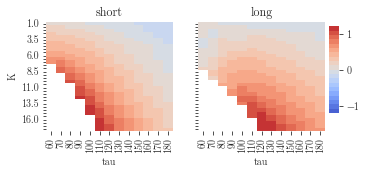

threshold 0.7
-0.5015883225998959 1.3650564680526647


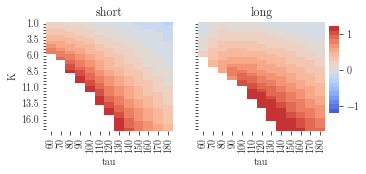

threshold 0.65
-0.5903071783508679 1.4505708361026972


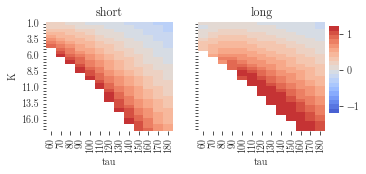

In [29]:
print('threshold', 0.75)
pt.plot_slope(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_slope(short_ktau065, long_ktau065, K_lst, tau)

threshold 0.75
3748.532114119628 120043.754850718


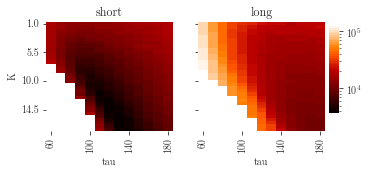

130 16.0
[(60, 5.5), (70, 5.0), (80, 6.5), (90, 8.0), (100, 10.5), (110, 12.0), (120, 14.0), (130, 16.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
180 17.5
[(60, 1.5), (70, 1.5), (80, 1.0), (90, 2.5), (100, 5.0), (110, 5.5), (120, 6.0), (130, 10.5), (140, 13.5), (150, 14.0), (160, 14.5), (170, 17.5), (180, 17.5)]
threshold 0.7
3351.702340621643 103081.51016117324


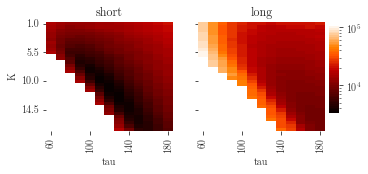

120 11.0
[(60, 3.5), (70, 4.5), (80, 5.5), (90, 7.0), (100, 8.5), (110, 9.5), (120, 11.0), (130, 13.0), (140, 14.0), (150, 16.5), (160, 17.5), (170, 17.5), (180, 17.5)]
180 16.5
[(60, 1.0), (70, 1.0), (80, 2.5), (90, 3.5), (100, 4.0), (110, 4.5), (120, 7.0), (130, 10.0), (140, 10.5), (150, 12.0), (160, 13.5), (170, 15.5), (180, 16.5)]
threshold 0.65
3170.3196620991193 82909.48408839782


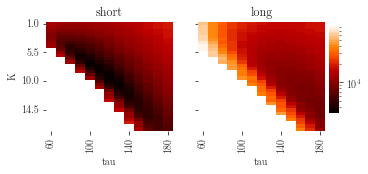

110 8.0
[(60, 3.0), (70, 4.0), (80, 5.0), (90, 6.0), (100, 7.0), (110, 8.0), (120, 9.0), (130, 10.5), (140, 12.0), (150, 14.0), (160, 15.5), (170, 17.0), (180, 17.5)]
180 15.0
[(60, 1.0), (70, 1.5), (80, 2.0), (90, 2.5), (100, 4.0), (110, 5.5), (120, 7.0), (130, 7.5), (140, 10.0), (150, 10.5), (160, 12.5), (170, 13.0), (180, 15.0)]


In [67]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau)
print(pt.get_opt_K(short_ktau075, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, mse=True))
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)
print(pt.get_opt_K(short_ktau07, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, mse=True))
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau)
print(pt.get_opt_K(short_ktau065, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, mse=True))

0.7131432101915092
0.6069505377196279


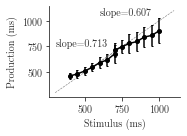

In [46]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=120, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 9
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 7
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_beh.png', dpi=500, bbox_inches='tight')

threshold 0.75
297.584162608647 83184.43687542142


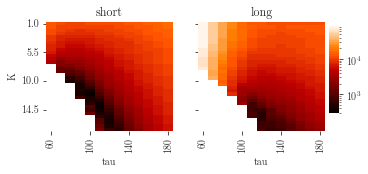

100 12.0
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 12.0), (100, 12.0), (110, 14.0), (120, 16.0), (130, 17.5), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
120 15.5
[(60, 7.5), (70, 9.0), (80, 10.0), (90, 11.5), (100, 13.0), (110, 14.5), (120, 15.5), (130, 17.5), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
threshold 0.7
255.64043836046275 66646.845690239


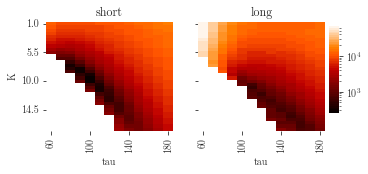

100 9.5
[(60, 5.5), (70, 6.5), (80, 7.5), (90, 8.0), (100, 9.5), (110, 11.0), (120, 12.5), (130, 14.5), (140, 16.0), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
110 11.0
[(60, 6.0), (70, 7.0), (80, 8.0), (90, 9.0), (100, 10.0), (110, 11.0), (120, 12.0), (130, 13.0), (140, 14.5), (150, 15.5), (160, 17.0), (170, 17.5), (180, 17.5)]
threshold 0.65
237.75198828986586 48729.73513975592


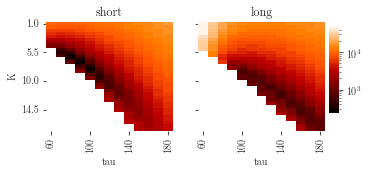

90 7.0
[(60, 4.5), (70, 5.5), (80, 6.0), (90, 7.0), (100, 8.0), (110, 9.5), (120, 10.5), (130, 12.0), (140, 13.5), (150, 14.5), (160, 16.5), (170, 17.5), (180, 17.5)]
130 11.0
[(60, 5.0), (70, 5.5), (80, 6.5), (90, 7.5), (100, 8.5), (110, 9.0), (120, 10.0), (130, 11.0), (140, 12.0), (150, 13.5), (160, 15.0), (170, 16.0), (180, 17.5)]


In [68]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias2=True))
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau07, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, bias2=True))
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau065, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, bias2=True))

threshold 0.75
-272.0137605098891 21.4458324963563


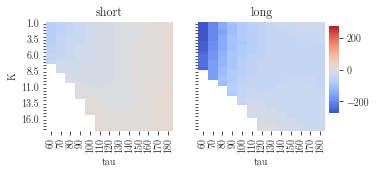

150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]
threshold 0.7
-236.89817567270327 39.126163814863176


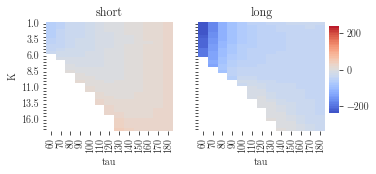

150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]
threshold 0.65
-196.8383366964931 49.977885468568694


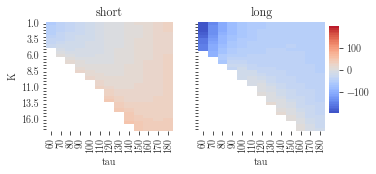

150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]


In [33]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))

0.826029533022673
None


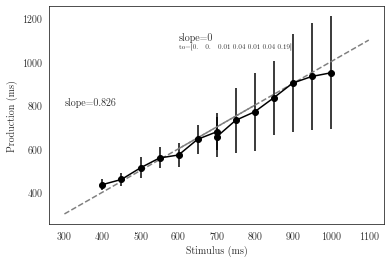

In [46]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=100, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

K = 7.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 9.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.75
247344.16632443533 636075.6129032258


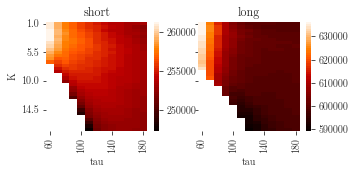

threshold 0.7
245641.24640657083 630249.2244488978


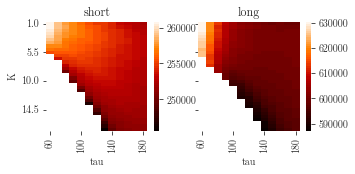

threshold 0.65
244418.3353909465 624048.832


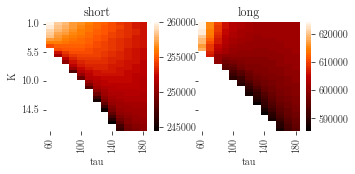

In [87]:
print('threshold', 0.75)
pt.plot_mse_total(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_mse_total(short_ktau065, long_ktau065, K_lst, tau)

## Initialization

In [74]:
tau = np.arange(0, 21, 1)

In [75]:
path = '../results/intermediateI/'
short_ktau07_seed, long_ktau07_seed = pt.load_data(path+'SHORT_K1-18TAU105_th075_del700_sig02_seed-20220727-154931-output.pickle',
                                      path+'LONG_K1-18TAU105_th075_del700_sig02_seed-20220728-085905-output.pickle')

-0.17545456066214304 1.3282618560109798


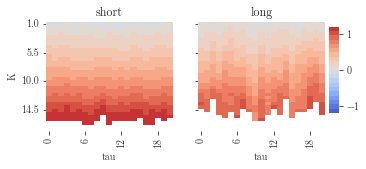

In [76]:
pt.plot_slope(short_ktau07_seed, long_ktau07_seed, K_lst, tau)

4027.0570565140415 52458.384745726056


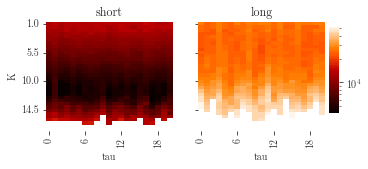

17 12.0
[(0, 11.5), (1, 11.0), (2, 11.0), (3, 11.5), (4, 11.5), (5, 11.5), (6, 12.5), (7, 11.0), (8, 11.5), (9, 12.0), (10, 12.0), (11, 11.5), (12, 11.0), (13, 11.0), (14, 11.0), (15, 10.5), (16, 11.5), (17, 12.0), (18, 12.0), (19, 11.0), (20, 11.5)]
10 5.0
[(0, 5.0), (1, 2.5), (2, 2.5), (3, 3.5), (4, 2.0), (5, 2.5), (6, 4.5), (7, 6.0), (8, 4.0), (9, 7.5), (10, 5.0), (11, 4.0), (12, 3.5), (13, 6.0), (14, 3.5), (15, 6.0), (16, 6.0), (17, 4.0), (18, 4.5), (19, 4.5), (20, 5.5)]


In [77]:
pt.plot_mse(short_ktau07_seed, long_ktau07_seed, K_lst, tau)
print(pt.get_opt_K(short_ktau07_seed, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07_seed, K_lst, tau, mse=True))

In [78]:
np.mean(list(zip(*pt.get_opt_K(short_ktau07_seed, K_lst, tau, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(short_ktau07_seed, K_lst, tau,mse=True)))[1])

17 12.0
17 12.0


(11.428571428571429, 0.47020042043170235)

In [79]:
np.mean(list(zip(*pt.get_opt_K(long_ktau07_seed, K_lst, tau, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(long_ktau07_seed, K_lst, tau, mse=True)))[1])

10 5.0
10 5.0


(4.404761904761905, 1.4025406166688703)

-85.48660333698696 22.701907577583434


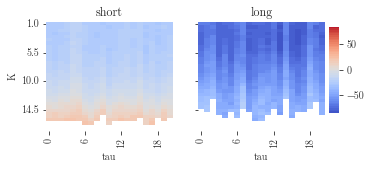

8 13.5
[(0, 13.0), (1, 13.5), (2, 13.0), (3, 13.0), (4, 12.0), (5, 12.0), (6, 13.5), (7, 14.0), (8, 13.5), (9, 12.5), (10, 14.0), (11, 13.5), (12, 13.0), (13, 13.5), (14, 13.5), (15, 12.5), (16, 13.5), (17, 14.0), (18, 14.0), (19, 13.0), (20, 13.5)]
7 13.5
[(0, 13.5), (1, 14.5), (2, 12.5), (3, 13.0), (4, 14.5), (5, 14.5), (6, 14.5), (7, 13.5), (8, 14.5), (9, 14.5), (10, 15.0), (11, 15.0), (12, 13.5), (13, 13.0), (14, 12.5), (15, 14.5), (16, 14.5), (17, 14.5), (18, 14.0), (19, 13.0), (20, 15.0)]


In [80]:
pt.plot_mse(short_ktau07_seed, long_ktau07_seed, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau07_seed, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau07_seed, K_lst, tau, bias=True))